<a href="https://colab.research.google.com/github/2303a52351/AIML_2303a52351/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Implement Decision Tree Classi cation using OpenML Car Dataset
 In machine learning, decision trees are supervised learning models with associated learning
 algorithms that analyze data used for classi cation.
 Lets say that you want to make a decision of the car to buy. In order to get the right car
 to buy, you could go on and evaluate the level of the safety, the number of sits and doors by
 asking series of if like questions.
 1. Import the Libraries required for Decision Tree. [CO1]
 Import all libraries required along with visualization to completed the task on DT
 2. Import the OpenML Car Dataset from Sklearn Packages. [CO1]
 • Once downloaded the car data, prepare the dictionary format to access the data using
 its keys.
 • Describe all the features from the dictionary, feature names.
 • Setup the dataframe , describe itd details, check for missing values.
 • Identify the target class and assign it to the dataframe.
 • Perform exploratory analysis of dataframe using seabon- sns package
 • the Draw the boxplot of rst 10 columns to verify their role in decision to buy the car
 or not.
 3. Train and Test Data. [CO2]
 • Prepare the Train and Test data from the dataframe.
 • Drop the BinaryClass column and de ne the dataframe with only target results
 • Split the data into train, test using train
 test
 split
 1
4. Train the DT using the Train Dataset. [CO3]
 • import sklearn.tree import DecisionClassifier
 • Apply the model.fit to dataset
 5. Predict and Analysis the Performance of the DT Model. [CO4]
 • Apply model.predict(X
 test)
 • Generate the accuracy score, classi cation report, confusion matrix using sklearn.metrics
 • Plot the decision tree and it branches using from sklearn.tree import plot tree, plot. gure
 6. Improve the Accuracy of Model using GridSearchCV Model. [CO4]
 • Given the following parameters validate the GridSearchCV Model:
 param
 grid = C: [0.1,1, 10, 100, 1000], gamma: [1,0.1,0.01,0.001,0.0001],
 kernel: [rbf]
 • Implement the model.predict
 • Generate the classi cation report, confusion matrix using sklearn.metrics

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [ ]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,
                        parser='auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [ ]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
type(car_data)

pandas.core.frame.DataFrame

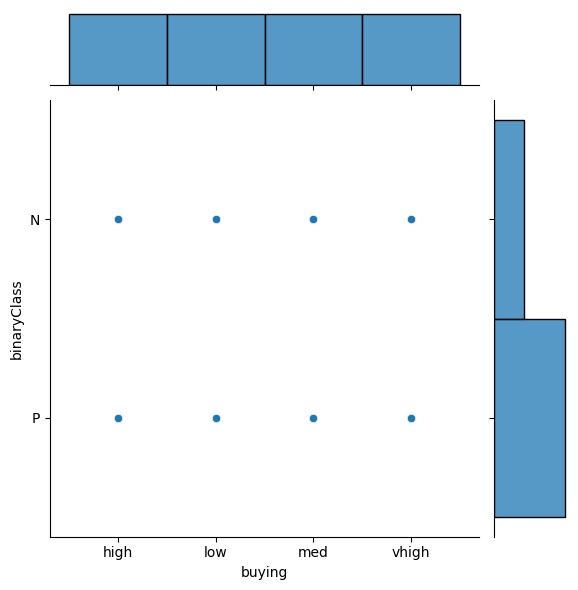

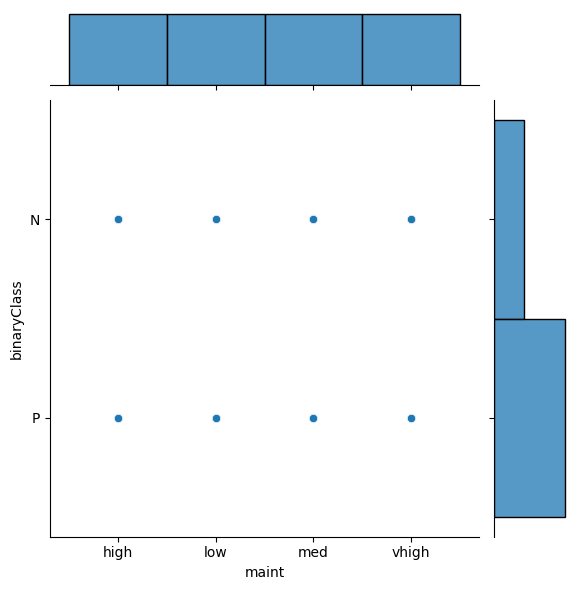

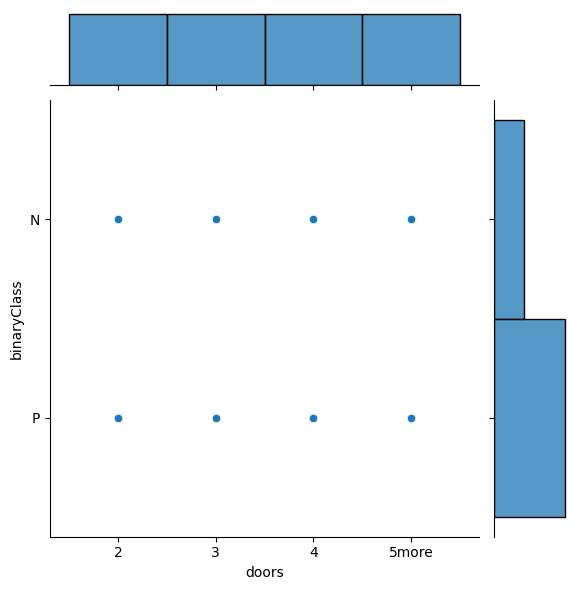

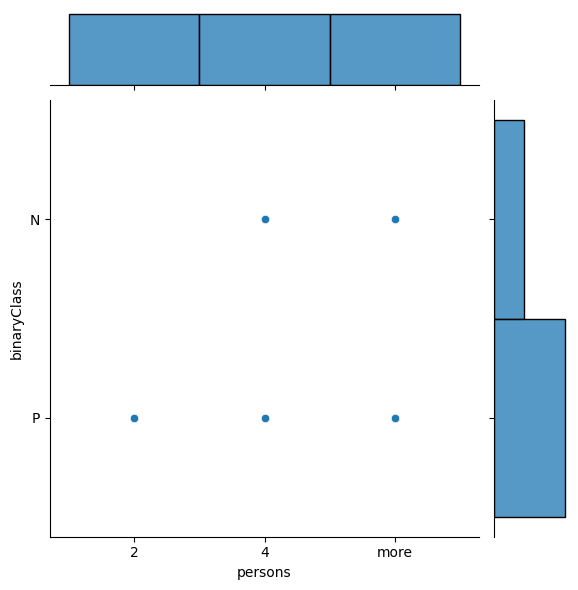

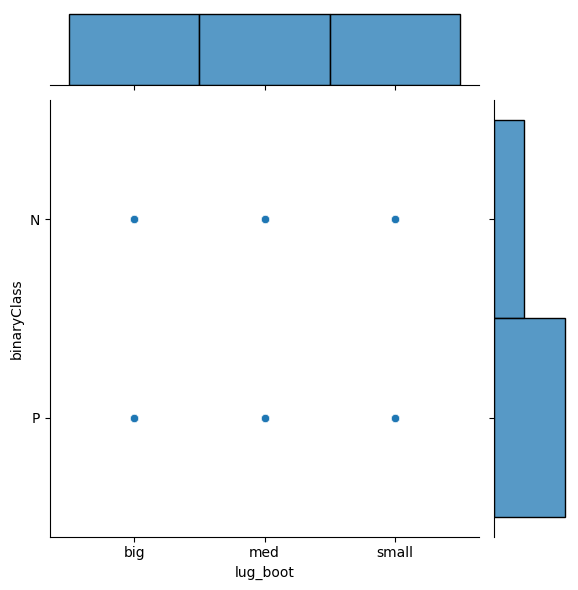

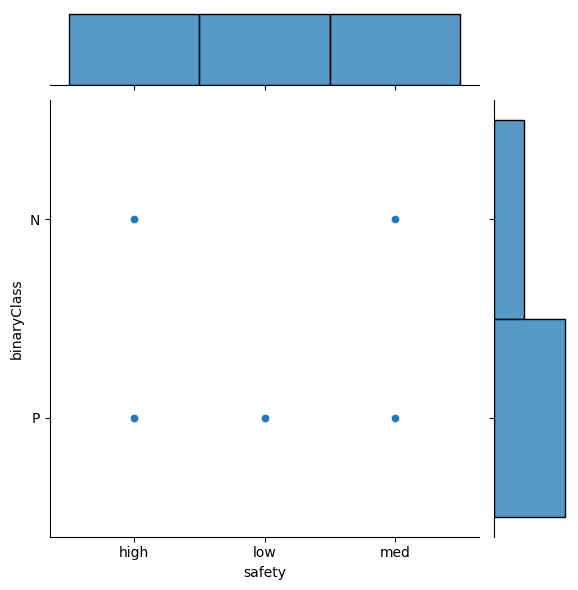

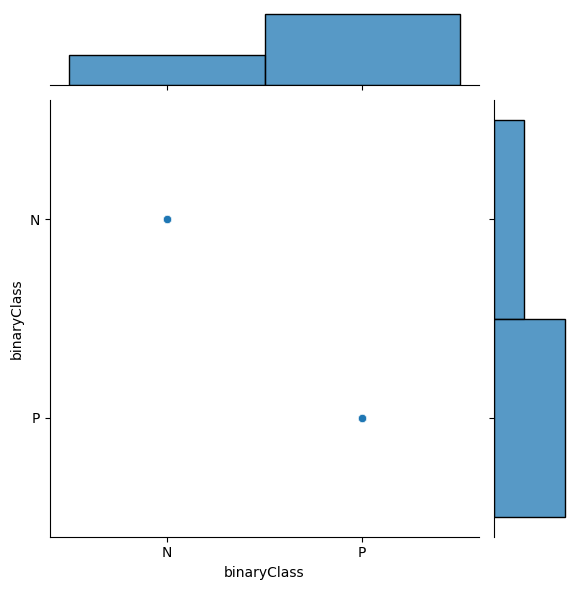

In [ ]:
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',
              data=car_data,palette='rainbow')

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.2,
                                         random_state=220)

#print('Dataset size:{}\ntraining data is: {}\n
#testing data is: {}'.format(len(car_data),
#                            len(train_data),len(test_data)))
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [ ]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [ ]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [ ]:
train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


In [ ]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


In [ ]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


In [ ]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

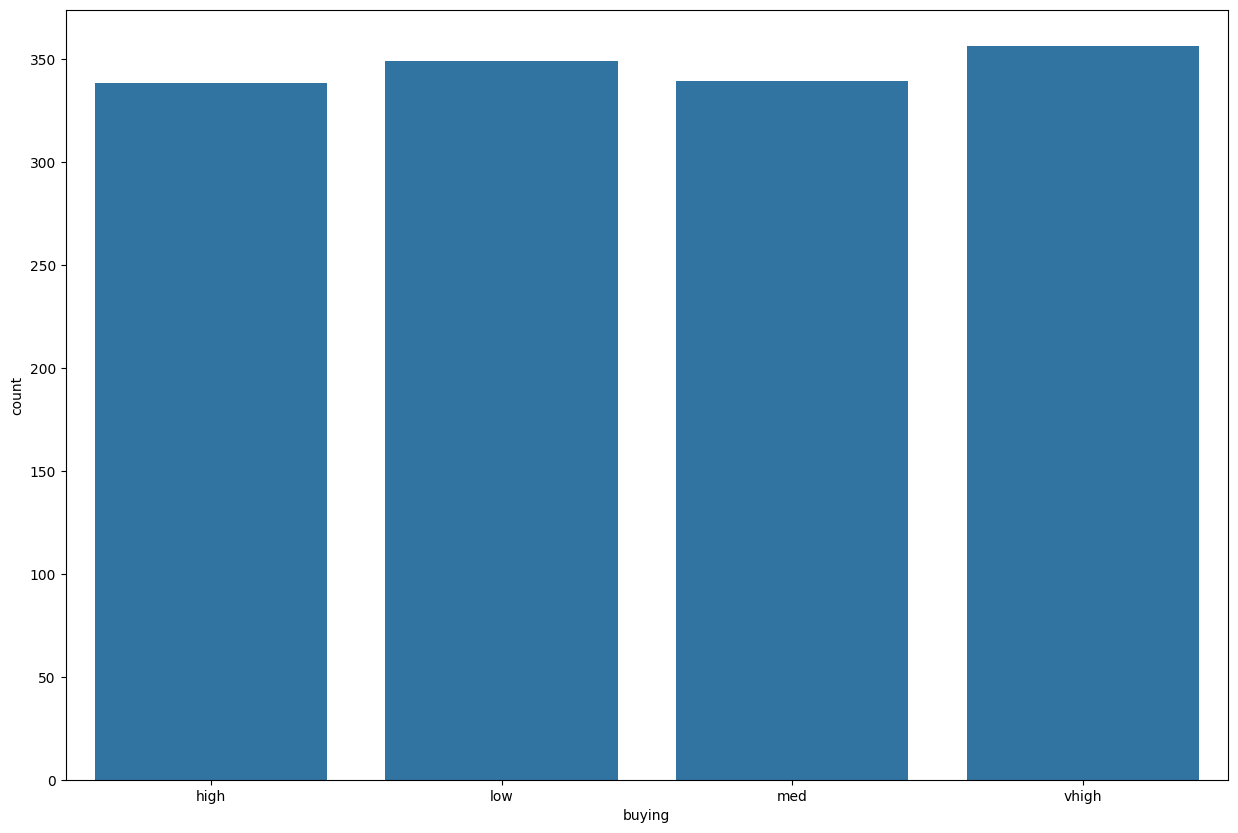

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

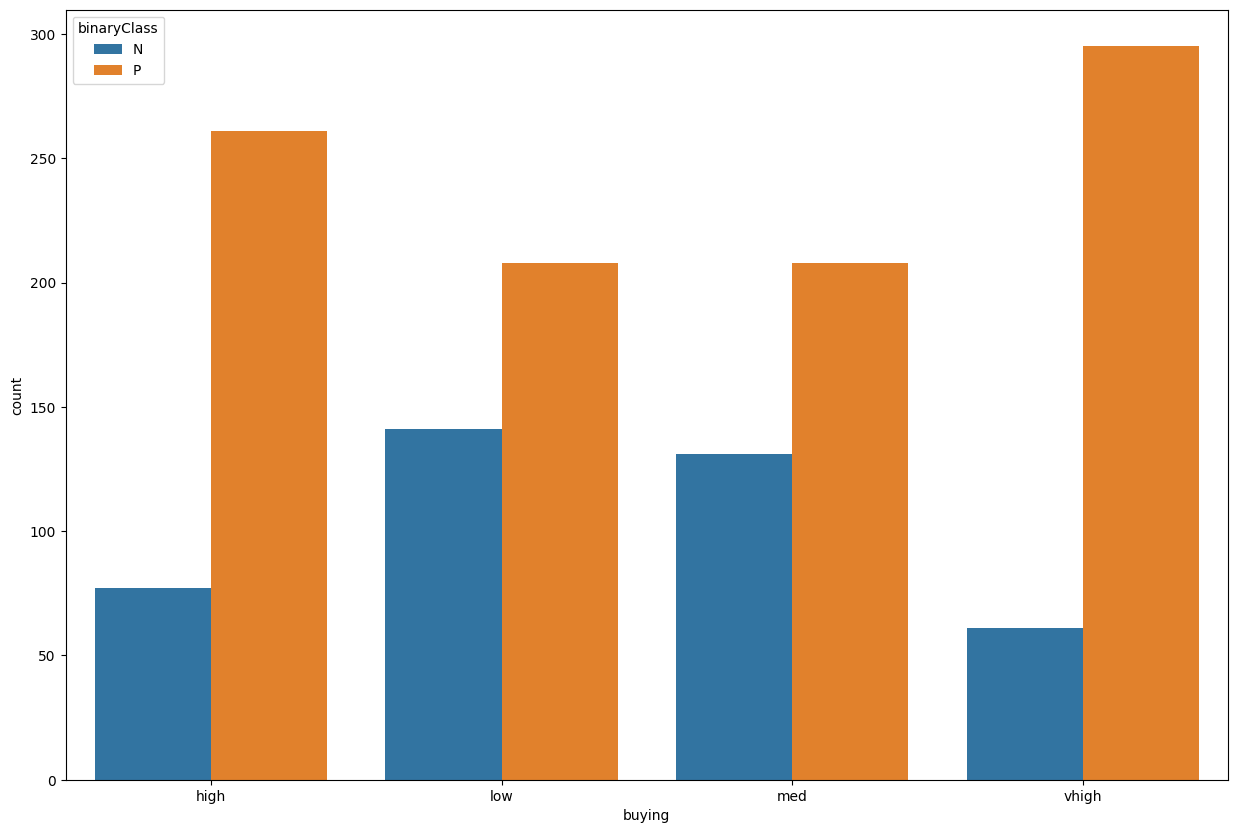

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [ ]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


<Axes: xlabel='maint', ylabel='count'>

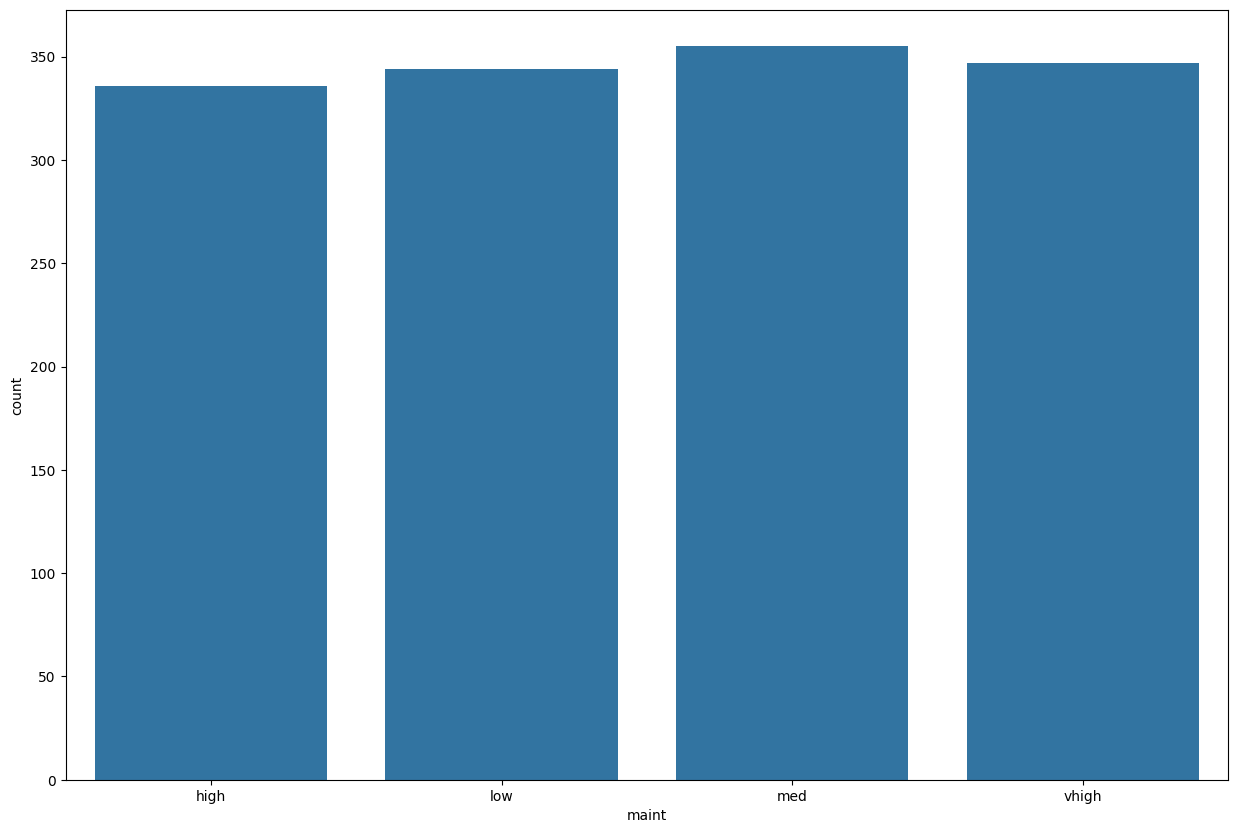

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

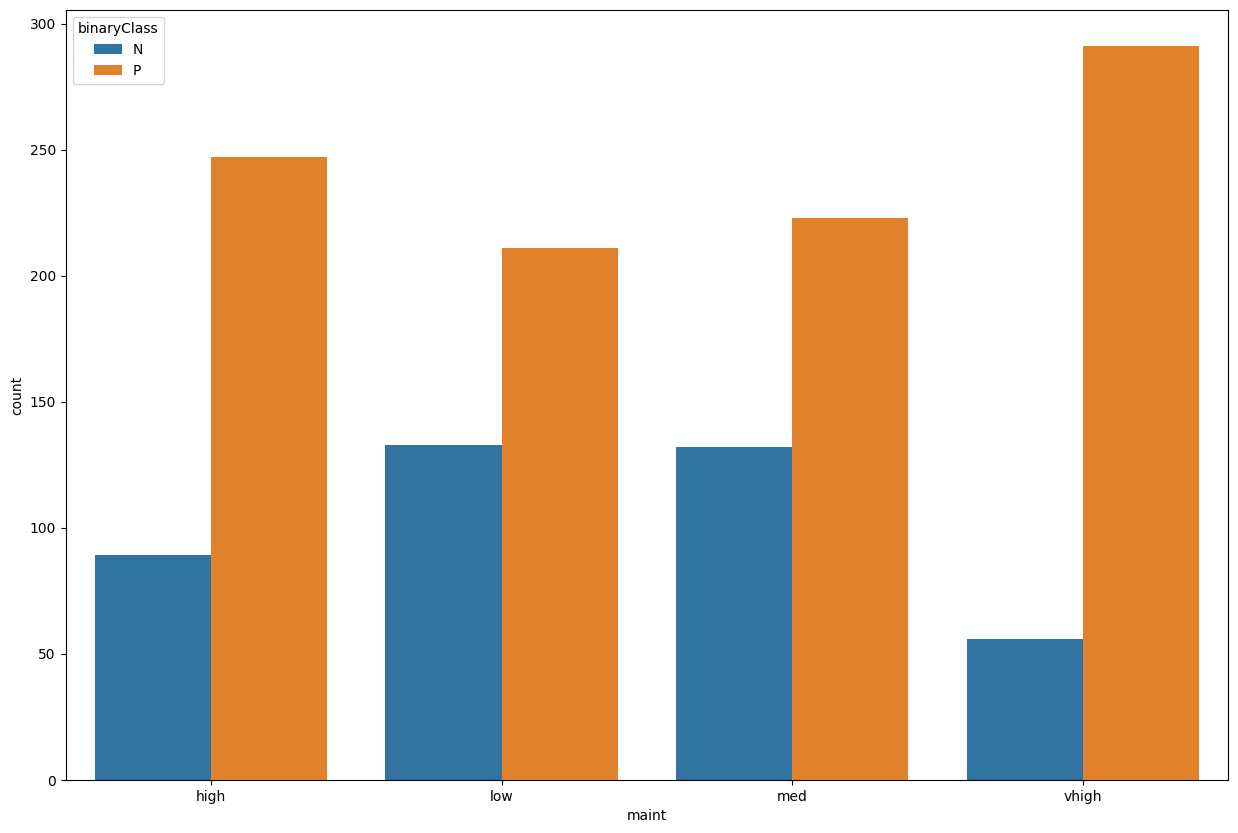

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [ ]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


<Axes: xlabel='doors', ylabel='count'>

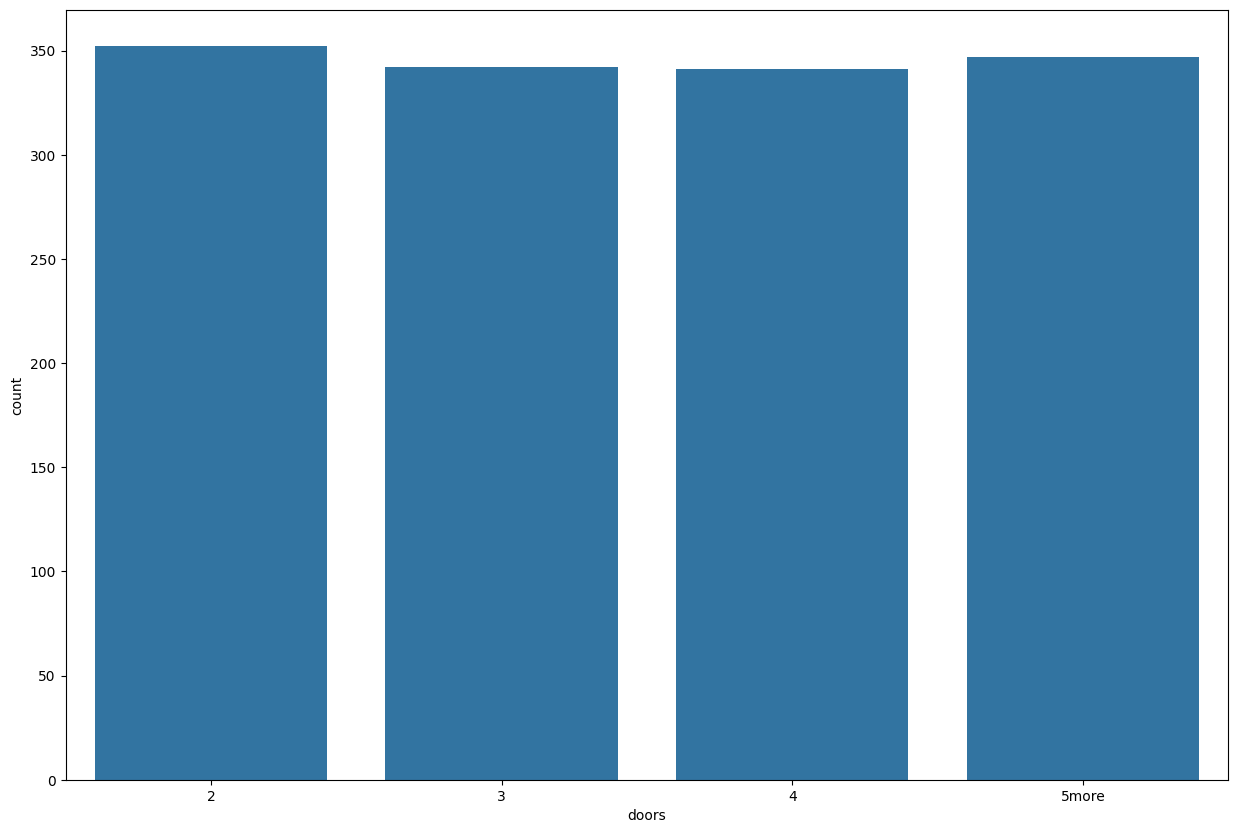

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

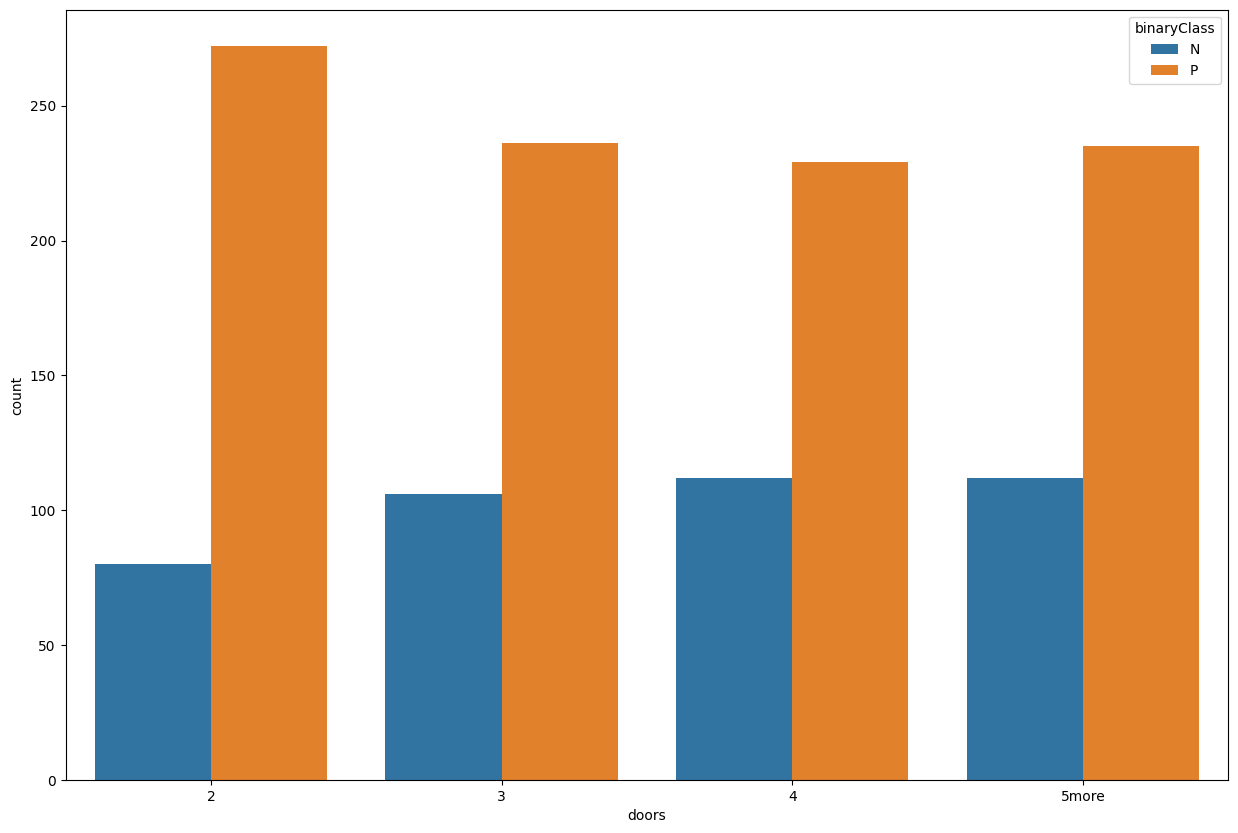

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [ ]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='persons', ylabel='count'>

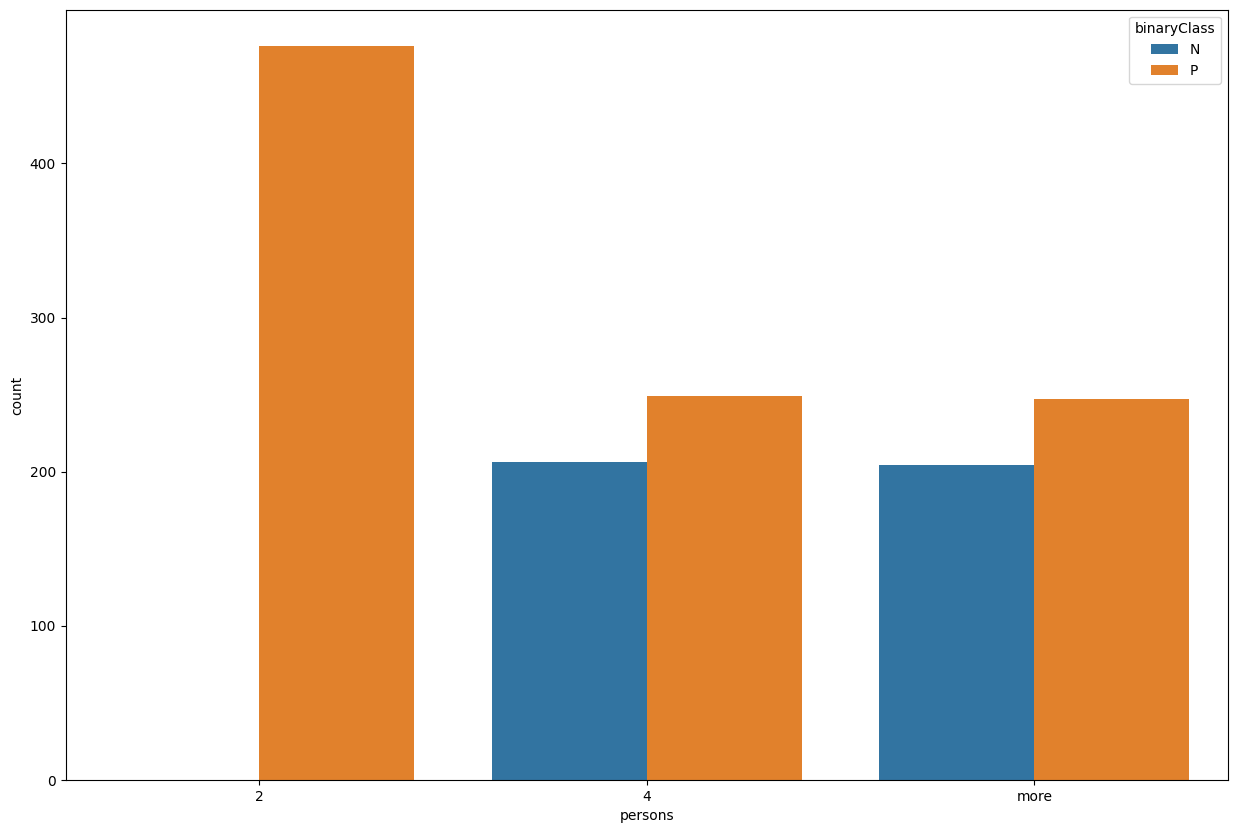

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [ ]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
small,478
med,466
big,438


<Axes: xlabel='lug_boot', ylabel='count'>

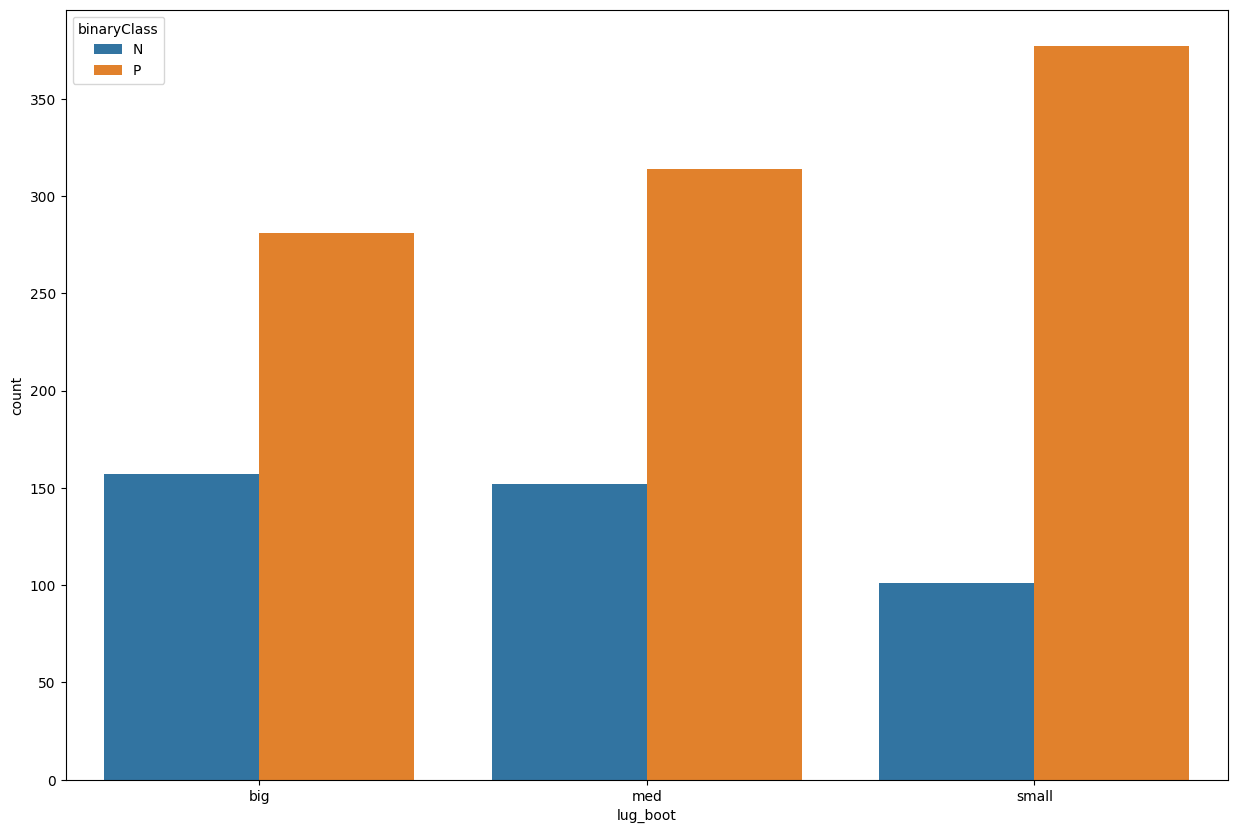

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [ ]:
train_data['safety'].value_counts()

,count
safety,
high,468
med,462
low,452


<Axes: xlabel='safety', ylabel='count'>

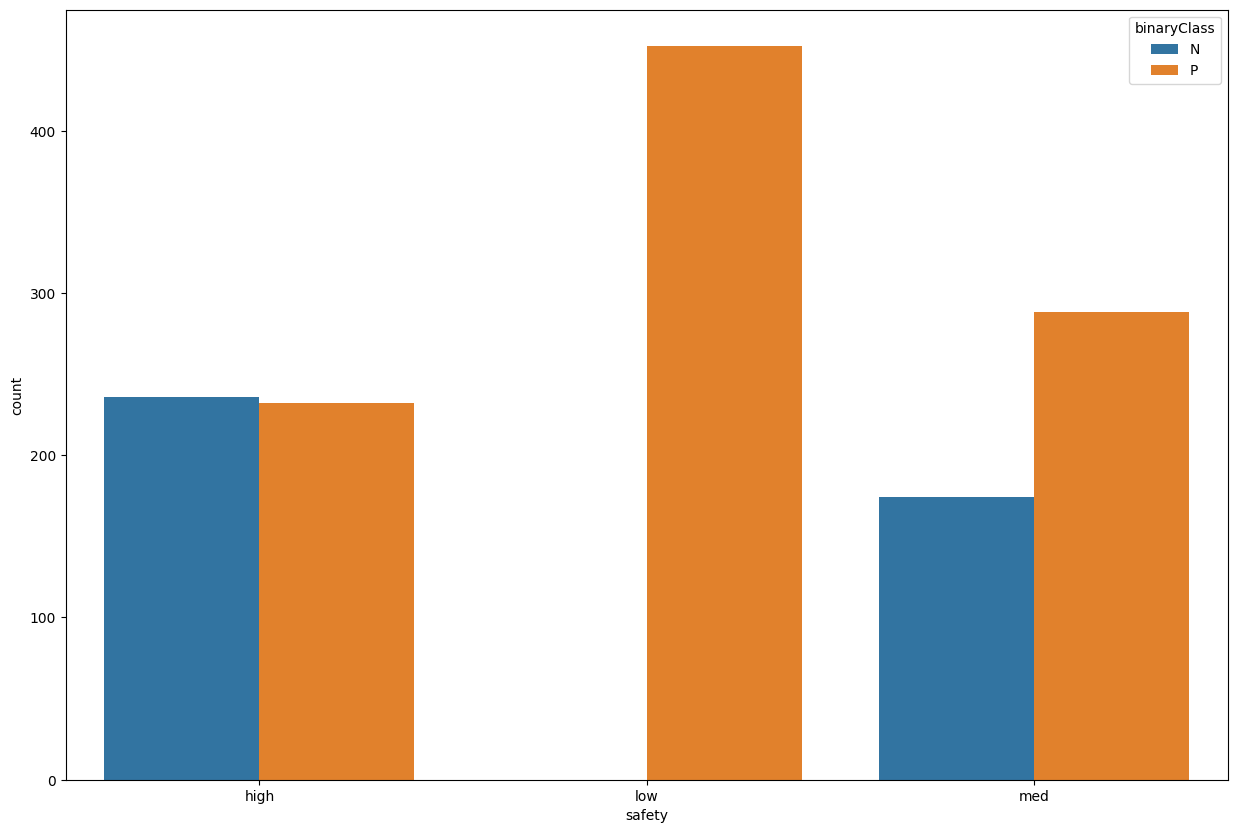

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [ ]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,972
N,410


<Axes: xlabel='binaryClass', ylabel='count'>

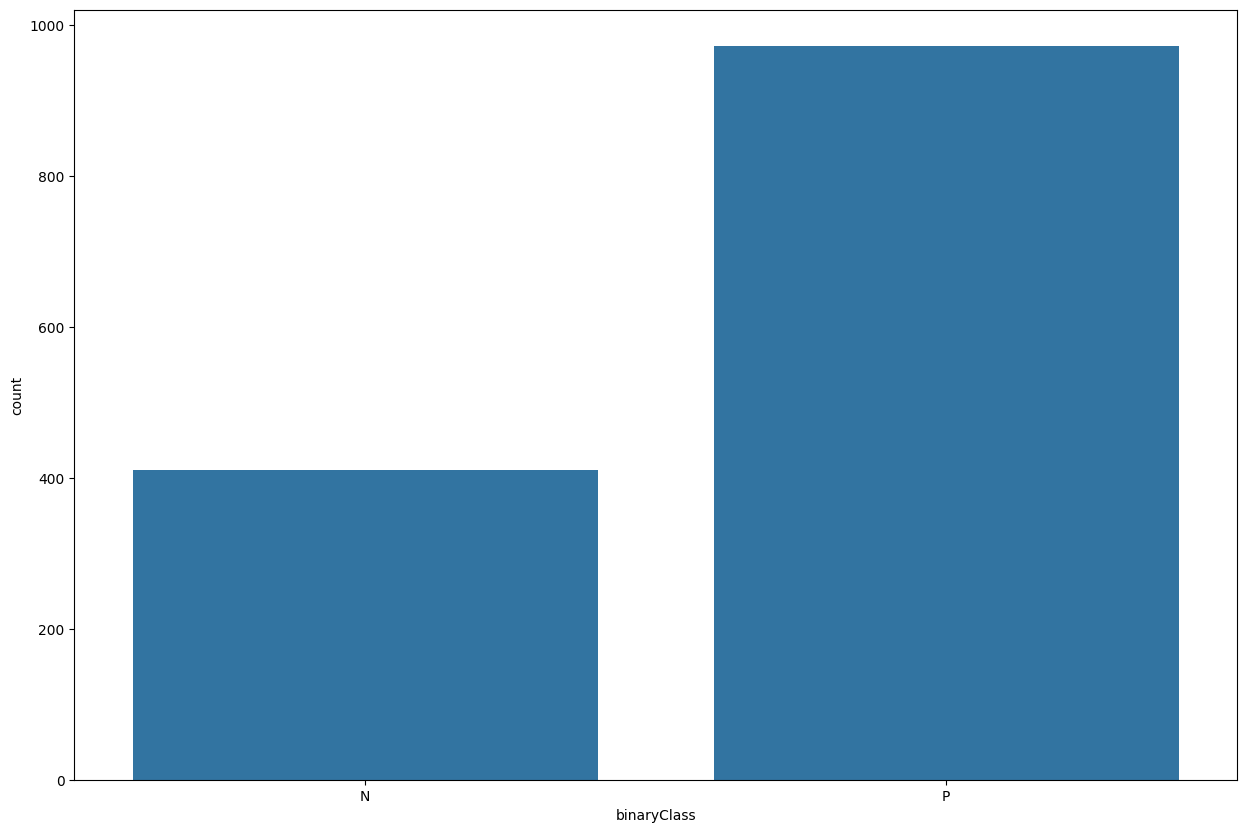

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

<Axes: xlabel='binaryClass', ylabel='count'>

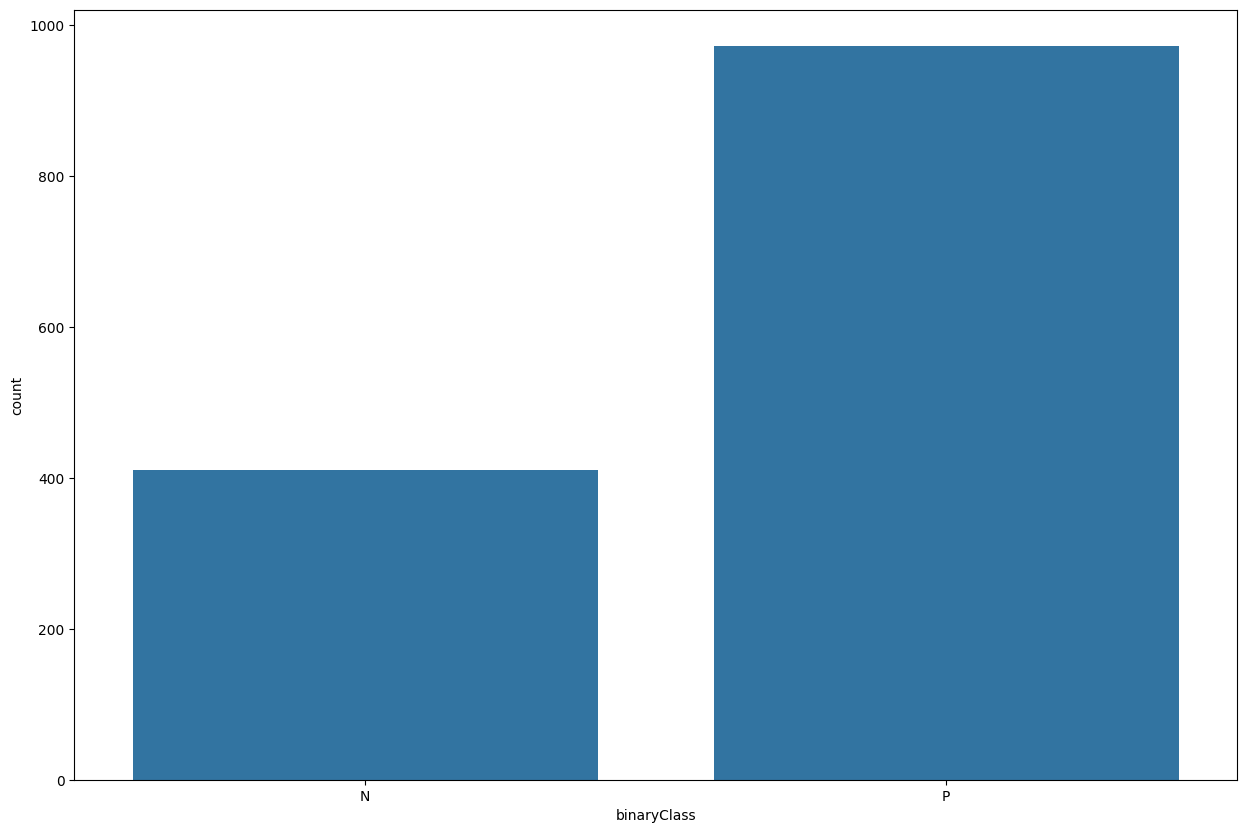

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

In [ ]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

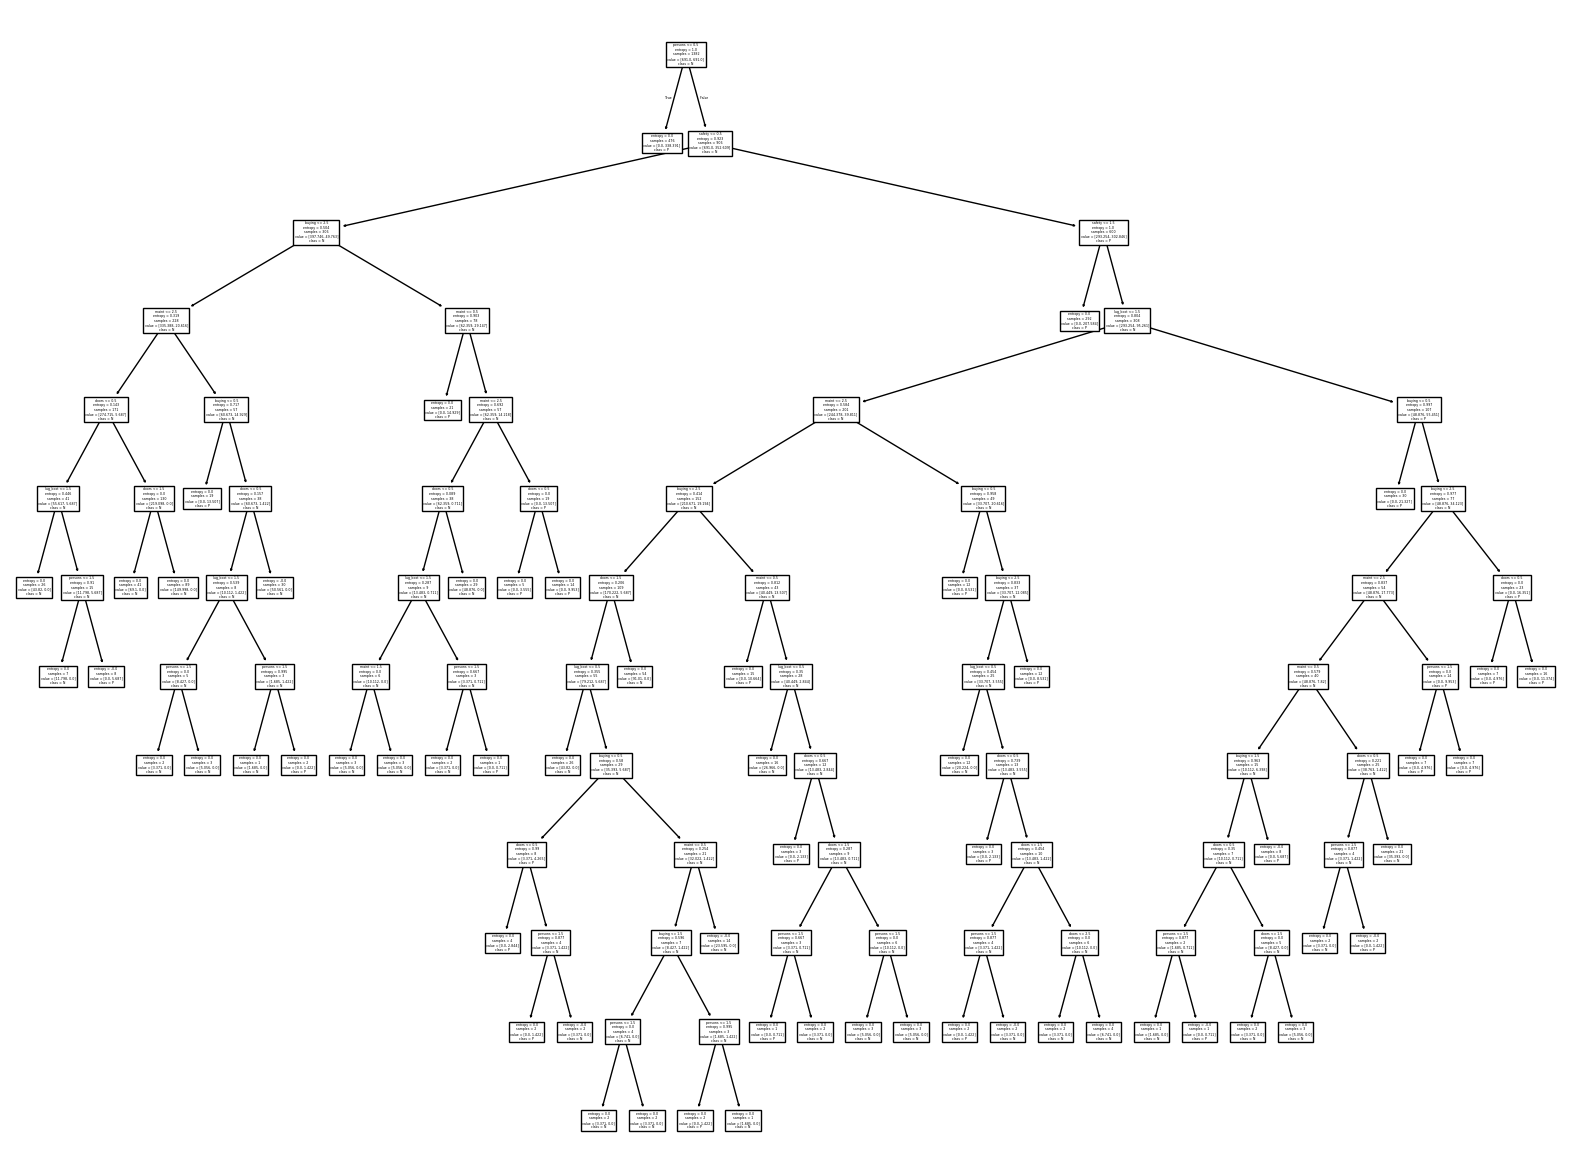

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,
          class_names=['N','P']);

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]


In [ ]:
accuracy_score(car_labels_prepared,preds)

1.0

In [ ]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_params_


{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [ ]:
tree_best = grid_search.best_estimator_

In [ ]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

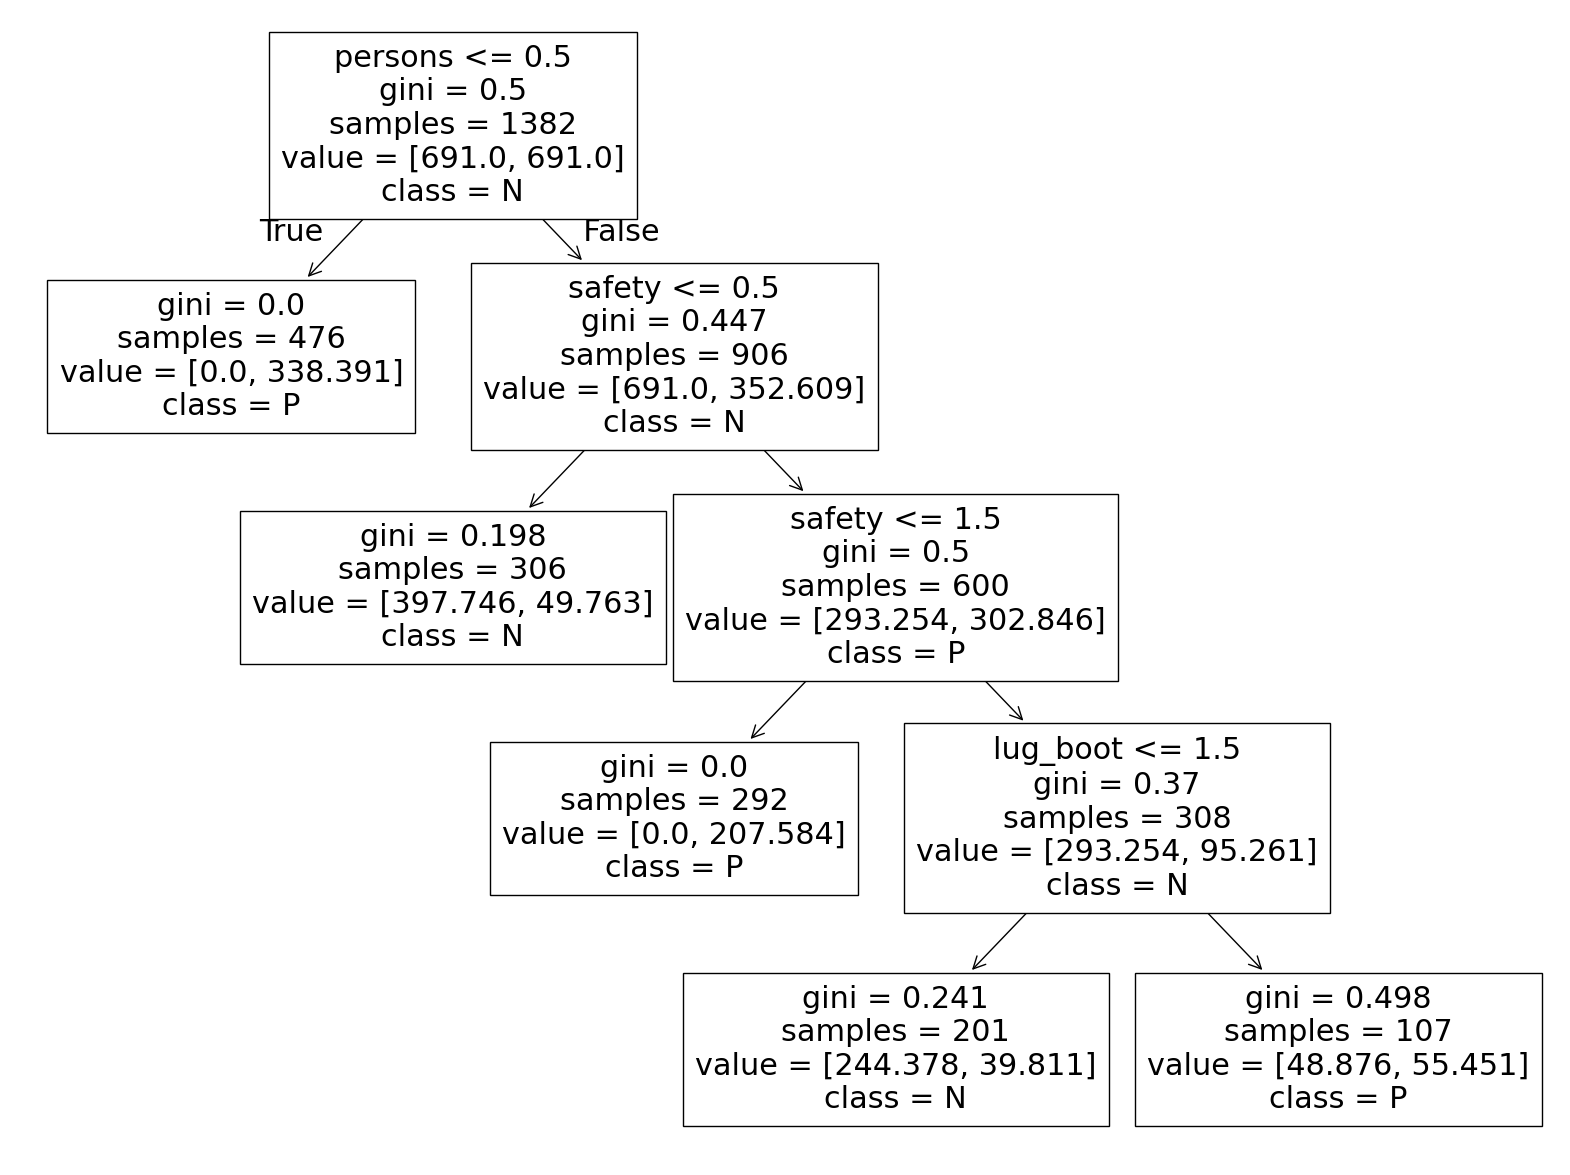

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]


In [ ]:
accuracy_score(car_labels_prepared,preds)

1.0

In [ ]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [ ]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [ ]:
tree_best = grid_search.best_estimator_

In [ ]:
car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

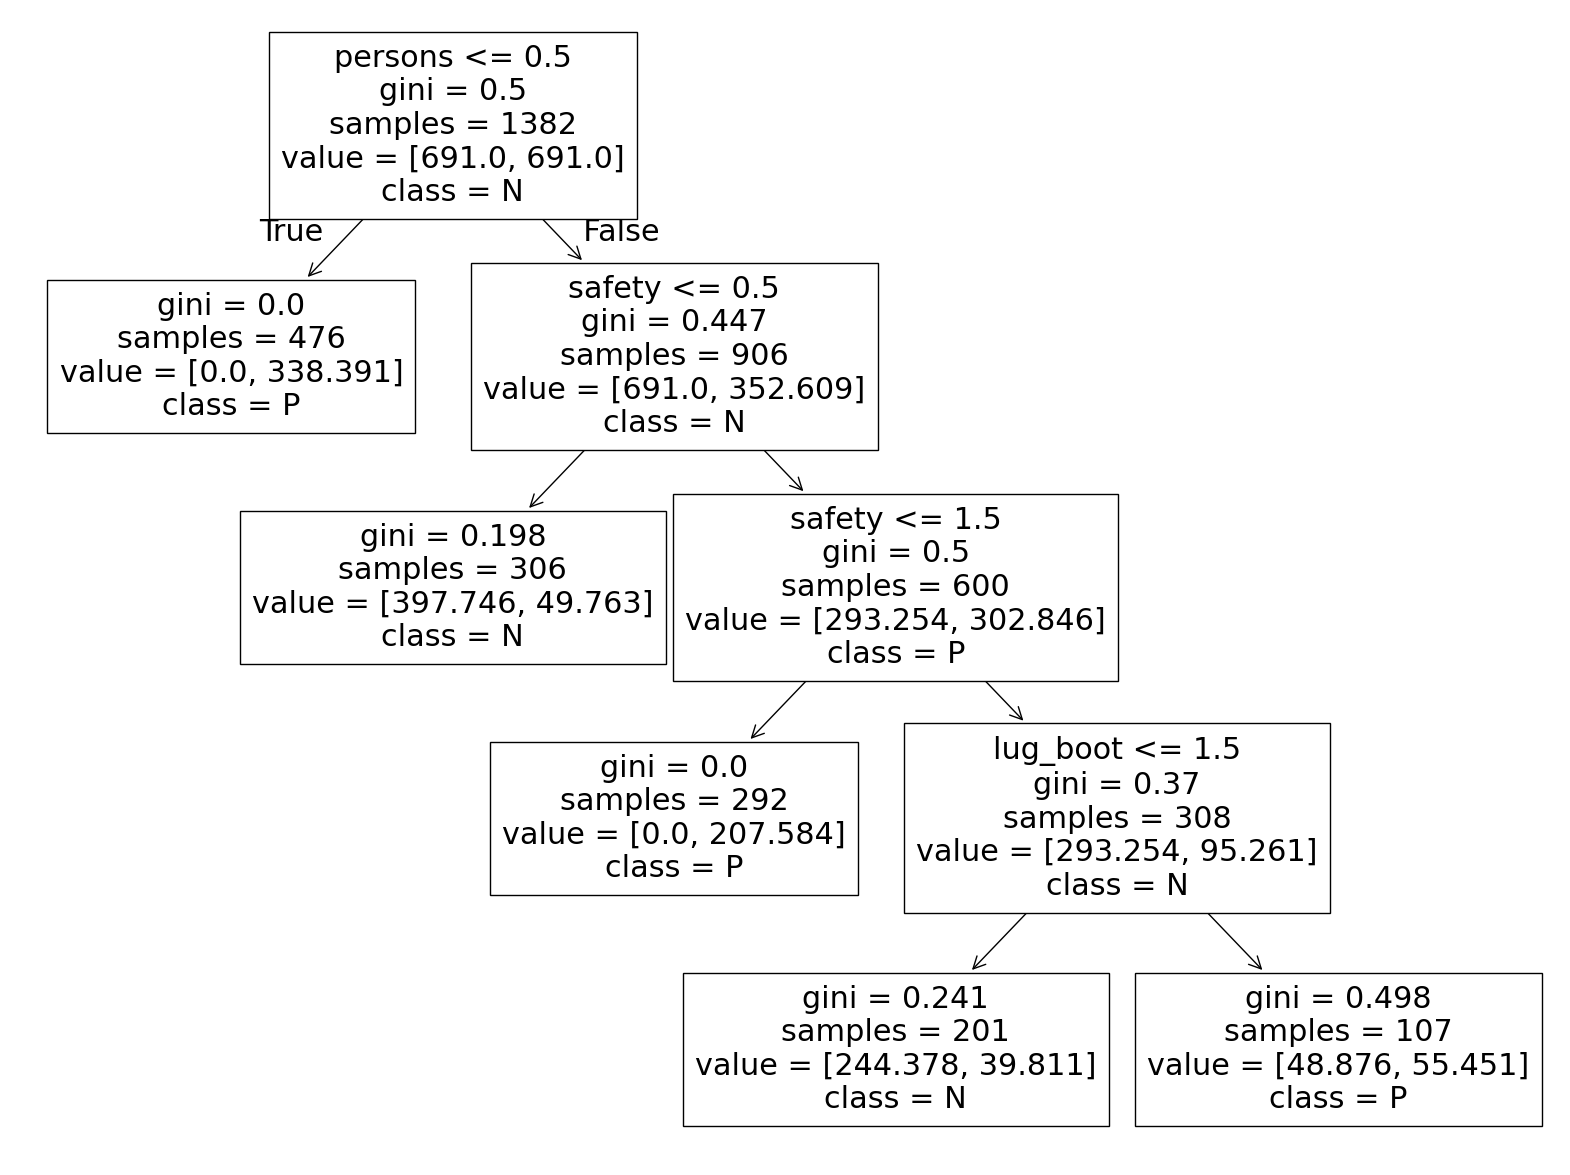

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [ ]:
accuracy(car_train_prepared, tree_best, car_labels_prepared)

0.8878437047756874

In [ ]:
from sklearn.metrics import confusion_matrix

# Predict labels using the trained model
y_pred = tree_best.predict(car_train_prepared)

# Generate the confusion matrix using true and predicted labels
conf_matrix = confusion_matrix(car_labels_prepared, y_pred)

#Print or do something with the confusion matrix
print(conf_matrix)

[[381  29]
 [126 846]]


In [ ]:
from sklearn.metrics import classification_report # Import the correct function

# Assuming car_train_prepared, tree_best, car_labels_prepared are defined

# Get predictions
y_pred = tree_best.predict(car_train_prepared)

# Generate and print the classification report
report = classification_report(car_labels_prepared, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       410
           1       0.97      0.87      0.92       972

    accuracy                           0.89      1382
   macro avg       0.86      0.90      0.87      1382
weighted avg       0.90      0.89      0.89      1382



In [ ]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [ ]:
car_test_prepared = pipe.transform(car_test)

In [ ]:
car_test_labels_prepared = label_enc.transform(car_test_labels)

In [ ]:
accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8930635838150289

In [ ]:
# Assuming your conf_matrix function was defined earlier and is now overwritten
# You will need to redefine it or reload the module where it was defined.

# Here's a basic example of a conf_matrix function if it's not defined anywhere else:
import numpy as np

def conf_matrix(X, model, y_true):
  """
  Computes the confusion matrix for a given model and data.

  Args:
    X: Input data for predictions.
    model: The trained machine learning model.
    y_true: The true labels for the input data.

  Returns:
    A NumPy array representing the confusion matrix.
  """

  y_pred = model.predict(X)  # Assuming your model has a predict method
  cm = np.zeros((2, 2), dtype=int)  # Initialize a 2x2 confusion matrix

  for i in range(len(y_true)):
    if y_true[i] == y_pred[i] == 0:  # True negative
      cm[0, 0] += 1
    elif y_true[i] == y_pred[i] == 1:  # True positive
      cm[1, 1] += 1
    elif y_true[i] == 0 and y_pred[i] == 1:  # False positive
      cm[0, 1] += 1
    elif y_true[i] == 1 and y_pred[i] == 0:  # False negative
      cm[1, 0] += 1

  return cm

# Now, you should be able to call conf_matrix correctly
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

array([[102,   6],
       [ 31, 207]])

In [ ]:
from sklearn.metrics import classification_report

# Predict labels using the model
predicted_labels = tree_best.predict(car_test_prepared)

# Call classification_report with predicted labels
report = classification_report(car_test_labels_prepared, predicted_labels)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       108
           1       0.97      0.87      0.92       238

    accuracy                           0.89       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.91      0.89      0.90       346

